# LinkedIn October Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


metrics_data = pd.read_csv('data/metrics-data.csv')
followers_data = pd.read_csv('data/followers_data.csv')



metrics_data.head()

,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Reposts (organic),Reposts (sponsored),Reposts (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
0,08/12/2023,687,0,687,387,7,0,7,22,0,22,1,0,1,0,0,0,0.043668,0,0.043668
1,08/13/2023,525,0,525,253,16,0,16,6,0,6,0,0,0,0,0,0,0.041905,0,0.041905
2,08/14/2023,2160,0,2160,695,42,0,42,112,0,112,0,0,0,0,0,0,0.071296,0,0.071296
3,08/15/2023,1964,0,1964,628,14,0,14,-167,0,-167,-34,0,-34,2,0,2,-0.094196,0,-0.094196
4,08/16/2023,944,0,944,375,15,0,15,31,0,31,0,0,0,1,0,1,0.049788,0,0.049788


## Reach Analysis


In [2]:
metrics_data['Date'] = pd.to_datetime(metrics_data['Date'])
metrics_data = metrics_data.set_index('Date')

type_map = {
    'Impressions (organic)': int,
    'Impressions (sponsored)': int,
    'Impressions (total)': int,
    'Clicks (total)': int,
    'Reactions (total)': int,
    'Comments (total)': int,
    'Reposts (total)': int,
    'Engagement rate (organic)': float,
    'Engagement rate (sponsored)': float,
    'Engagement rate (total)': float
}

for column, dtype in type_map.items():
    metrics_data[column] = metrics_data[column].astype(str).astype(dtype)

metrics_data.shape

(365, 19)

In [3]:
total_engagement = metrics_data[['Clicks (total)', 'Reactions (total)', 'Comments (total)', 'Reposts (total)']].sum(axis=1)
print(total_engagement.mean())

121.78356164383561


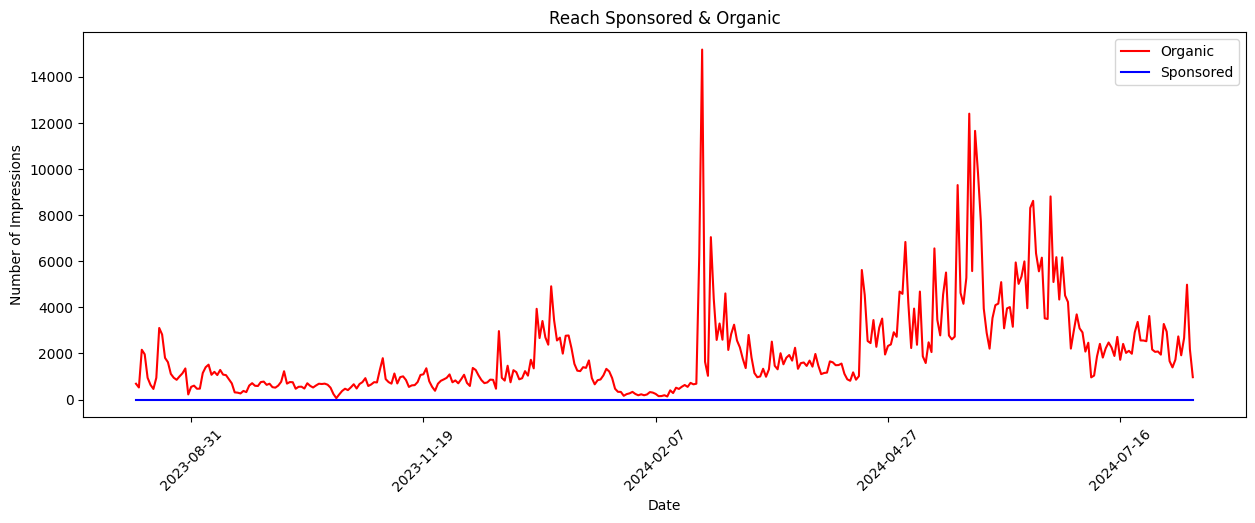

In [14]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,5))

ax1.plot(metrics_data.index,metrics_data['Impressions (organic)'],label='Organic',c='red')
ax1.plot(metrics_data.index,metrics_data['Impressions (sponsored)'],label='Sponsored',c='blue')
ax1.legend()
ax1.set_title('Reach Sponsored & Organic')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Impressions')
ax1.tick_params(axis='x', rotation=45)  
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=6)) 


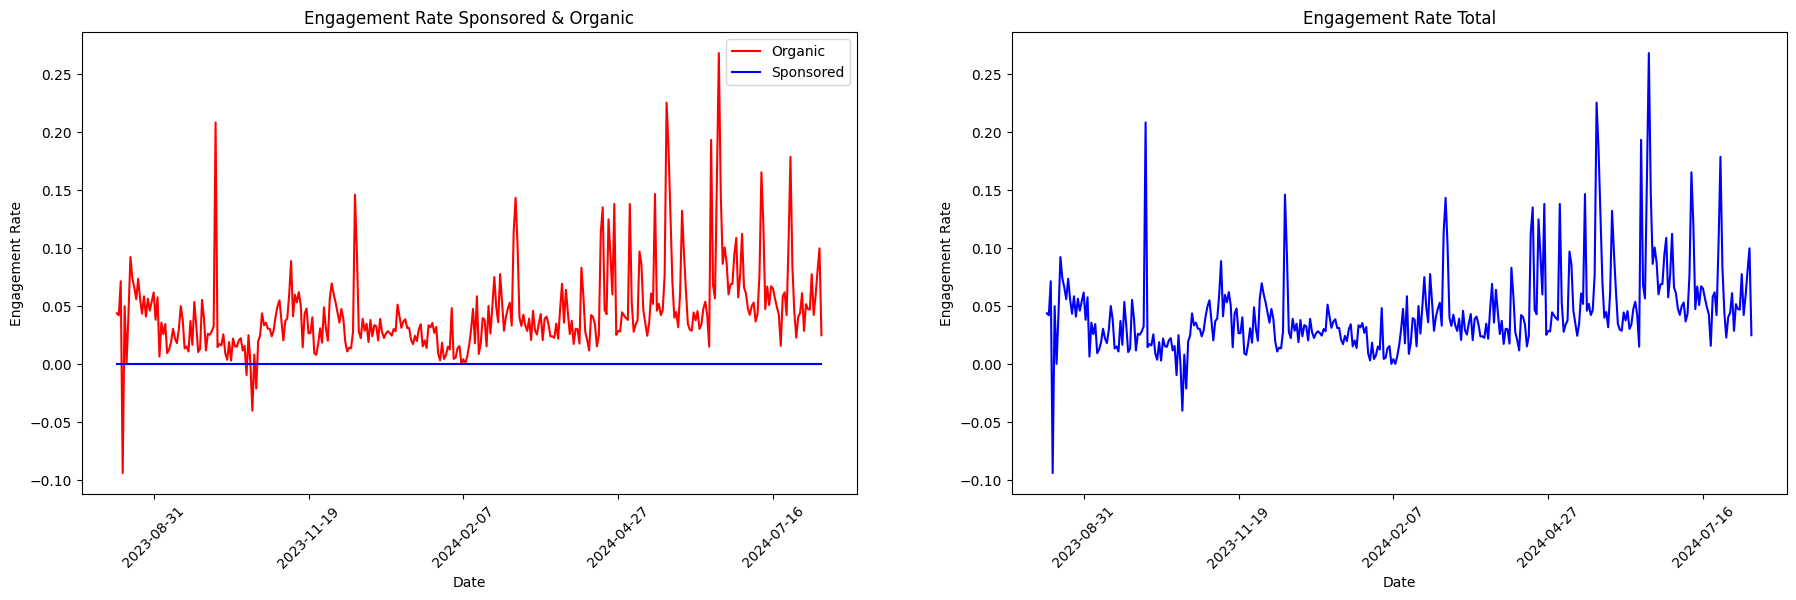

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,6))

ax1.plot(metrics_data.index,metrics_data['Engagement rate (organic)'],label='Organic',c='red')
ax1.plot(metrics_data.index,metrics_data['Engagement rate (sponsored)'],label='Sponsored',c='blue')
ax1.legend()
ax1.set_title('Engagement Rate Sponsored & Organic')
ax1.set_xlabel('Date')
ax1.set_ylabel('Engagement Rate')
ax1.tick_params(axis='x', rotation=45)  
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=6)) 

ax2.plot(metrics_data.index,metrics_data['Engagement rate (total)'],label='Organic', c='blue')
ax2.set_title('Engagement Rate Total')
ax2.set_xlabel('Date')
ax2.set_ylabel('Engagement Rate')
ax2.tick_params(axis='x', rotation=45)  
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=6)) 

plt.show()

In [6]:
followers_data.head()

,Date,Sponsored followers,Organic followers,Auto-invited followers,Total followers
0,08/13/2023,0,9,0,9
1,08/14/2023,0,20,0,20
2,08/15/2023,0,31,0,31
3,08/16/2023,0,16,0,16
4,08/17/2023,0,12,0,12


In [7]:
followers_data['Date'] = pd.to_datetime(followers_data['Date'])
followers_data = followers_data.set_index('Date')

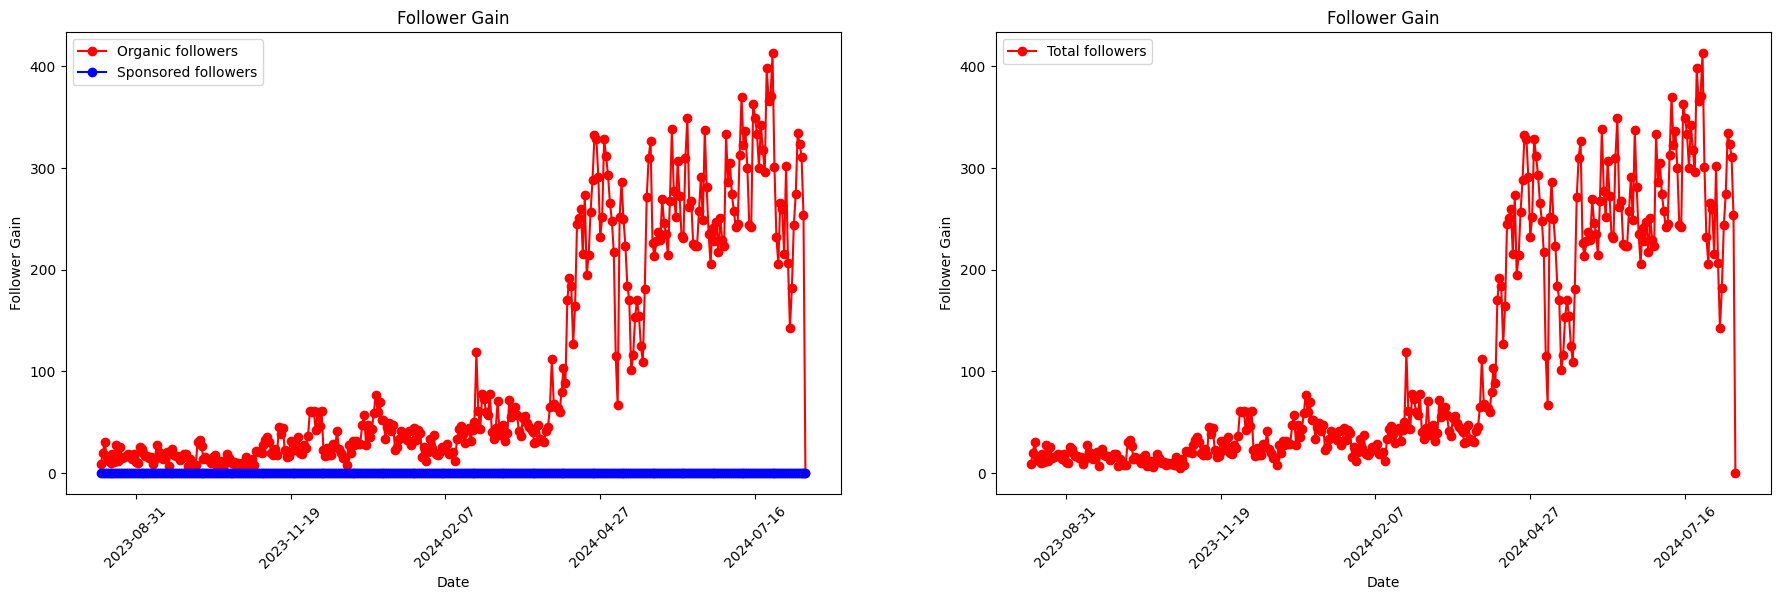

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(22,6))

ax1.plot(followers_data.index,followers_data['Organic followers'],c='red',label='Organic followers',marker='o')
ax1.plot(followers_data.index,followers_data['Sponsored followers'],c='blue',label='Sponsored followers',marker='o')
ax1.set_title('Follower Gain')
ax1.set_xlabel('Date')
ax1.set_ylabel('Follower Gain')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)  
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=6)) 


ax2.plot(followers_data.index, followers_data['Total followers'],c='red',label='Total followers',marker='o')
ax2.set_title('Follower Gain')
ax2.set_xlabel('Date')
ax2.set_ylabel('Follower Gain')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)  
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=6)) 

## Best Posts 

In [9]:
org_impression_mean = metrics_data['Impressions (organic)'].mean()
org_follower_mean = followers_data['Organic followers'].mean()
org_engagement_mean = metrics_data['Engagement rate (organic)'].mean()


best_follower_dates = []
for index, row in metrics_data.iterrows():
    val1 = row['Impressions (organic)']
    val2 = row['Engagement rate (organic)']
    
    if val1 >= org_impression_mean and val2 >= org_engagement_mean:
        best_follower_dates.append(index.date())

def export_to_excel(post, file_name='best_posts.xlsx'):
    df = pd.DataFrame(post,columns=['Post Titles','Post Links','Post Type'])

    df.to_excel(file_name,index=False)

    print(f'Data successfully exported to {file_name}')


In [15]:
post_data = pd.read_csv('data/posts_data.csv')
post_data.columns = [None] * len(post_data.columns)
new_columns = []
for x in post_data.iloc[0]:
    new_columns.append(x)

post_data.columns = new_columns
post_data = post_data.drop(index=0)
post_data.head()

,"Navigating the EU AI Act: Key Insights from Michael Charles Borelli 🚀\n\nIn a recent webinar, Michael Charles Borrelli from AI & Partners explained the EU AI Act – a groundbreaking regulation categorizing AI systems by risk levels: unacceptable, high, limited, and minimal, each with specific compliance measures. Proactive data governance, ethical AI practices, and thorough risk assessments are crucial for ensuring the trustworthiness of AI systems. Borelli also highlighted the severe penalties for non-compliance, urging businesses to align their AI operations with the Act for safety, ethics, and legality.\n\nKey Takeaways from the EU AI Act ⚖️\n- Risk-Based Framework: AI systems classified into four risk levels with tailored compliance requirements.\n- Proactive Governance: Implement ethical practices and risk assessments to ensure trustworthy AI systems.\n- Compliance Urgency: Non-compliance may result in penalties up to 7% of global turnover or €35 million – align your AI systems promptly!\n\nWhy This Matters 💡\nThe EU AI Act serves as a roadmap for ethical AI deployment, crucial for businesses in healthcare, finance, or any AI-driven sector to uphold safety and public trust.\n\nWhat’s Your Next Move? 🤔\nIs your organization prepared for the new AI regulations? Like, share, and comment to engage in the discussion and share your insights!\n\n🔥 Let’s collaborate on navigating these changes together! 🔥\n#EUAIAct #AICompliance #DataGovernance #EthicalAI #TechRegulation",https://www.linkedin.com/feed/update/urn:li:activity:7227559327081869312,Organic,NaN,Mirko Peters,08/09/2024,NaN,NaN,All followers,1042,6461.0,NaN,23,0.022073,28,2,1,NaN,0.051823,Article
1,We are delighted to announce an upcoming webin...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Mirko Peters,07/21/2024,NaN,NaN,All followers,1803,455.0,NaN,165,0.091514,29,15,3,NaN,0.117582,Video
2,Mastering Data Leadership: A Must in Today’s B...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Mirko Peters,08/08/2024,NaN,NaN,All followers,1098,1440.0,NaN,33,0.030055,13,0,0,NaN,0.041894,Article
3,"🐾 Happy World Cat Day! 🐾\nToday, we tip our ha...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Mirko Peters,08/08/2024,NaN,NaN,All followers,783,8.0,NaN,6,0.007663,13,0,1,NaN,0.025543,Article
4,🚀 Embrace a Data-Driven Culture for Success\n\...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Mirko Peters,08/07/2024,NaN,NaN,All followers,419,783.0,NaN,9,0.021480,9,0,0,NaN,0.042959,Article
5,Transform Your Data Strategy with Microsoft Fa...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Mirko Peters,08/08/2024,NaN,NaN,All followers,2732,6613.0,NaN,78,0.028551,269,7,2,NaN,0.130307,Article


In [16]:
post_data['Created date'] = pd.to_datetime(post_data['Created date'])
post_data = post_data.set_index('Created date')

KeyError: 'Created date'

In [45]:
best_posts = []
best_posts_info = []
for index, row in post_data.iterrows():
    if index.date() in best_follower_dates: #and index.date() in best_follower_dates:
        best_posts.append(row['Posted by'][:7])
        best_posts_info.append((row['Post title'], row['Post link'],row['Post type']))

In [ ]:
best_posts2 = ['MindMap Team' if name == 'Ammar A' or name == 'Amena K' or 'Amna H' else 'JazzCash Team' for name in best_posts]

print(best_posts2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(x=best_posts, color='blue', bins=9)
ax1.set_xlabel('Names of posters')
ax1.set_ylabel('Number of posts')
ax1.set_title('Number of posts greater than average')

ax2.hist(x=best_posts2, color='red',bins=3)
ax2.set_xlabel('Teams')
ax2.set_ylabel('Number of posts')
ax2.set_title('Number of posts greater than average')

In [ ]:
export_to_excel(best_posts_info)

## Location, Industry and Seniority visualization 

In [ ]:
type_map = {
    'Location':str,
    'Total followers':int
}

for column, dtype in type_map.items():
    data3[column] = data3[column].astype(str).astype(dtype)



In [ ]:
data3['Location'] = data3['Location'].replace({
    'Karachi Division, Pakistan' : 'Karachi, Pakistan',
    'Karāchi, Pakistan' : 'Karachi, Pakistan',
    'Lahore District, Pakistan' : 'Lahore, Pakistan'
})

data3 = data3.groupby('Location', as_index=False).sum()
data3 = data3.sort_values(by='Total followers',ascending=False)
print(data3)

In [ ]:
plt.pie(x=data3['Total followers'][:7],labels=(data3['Location'][:7]),autopct='%1.1f%%')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  

bars = plt.barh(data3['Location'][:7], data3['Total followers'][:7], color=['red','blue','green'])


for index, value in enumerate(data3['Total followers'][:7]):
    plt.text(value + 50, index, str(value), va='center') 

plt.xlabel('Total Followers')  
plt.title('Top Locations by Total Followers')  
plt.xlim(0, max(data3['Total followers'][:7]) + 1000)  
plt.tight_layout()  
plt.show()



In [ ]:
type_map = {
    'Industry': str,
    'Total followers': int
}

for column, dtype in type_map.items():
    data4[column] = data4[column].astype(str).astype(dtype)

In [ ]:
plt.pie(x=data4['Total followers'][:7],labels=(data4['Industry'][:7]),autopct='%1.1f%%')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  

bars = plt.barh(data4['Industry'][:7], data4['Total followers'][:7], color=['red','green','blue','red','green','blue'])


for index, value in enumerate(data4['Total followers'][:7]):
    plt.text(value + 50, index, str(value), va='center') 

plt.xlabel('Total Followers')  
plt.title('Top Locations by Total Followers')  
plt.xlim(0, max(data4['Total followers'][:7]) + 1000)  
plt.tight_layout()  
plt.show()



In [ ]:

type_map = {
    'Seniority':str,
    'Total followers':int
}

for column, dtype in type_map.items():
    data5[column] = data5[column].astype(str).astype(dtype)


In [ ]:
plt.pie(x=data5['Total followers'][:7],labels=(data5['Seniority'][:7]),autopct='%1.1f%%')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  

bars = plt.barh(data5['Seniority'][:7], data5['Total followers'][:7], color=['green','red','red','red','green','blue','blue'])


for index, value in enumerate(data5['Total followers'][:7]):
    plt.text(value + 50, index, str(value), va='center') 

plt.xlabel('Total Followers')  
plt.title('Top Locations by Total Followers')  
plt.xlim(0, max(data5['Total followers'][:7]) + 1000)  
plt.tight_layout()  
plt.show()

## Visitor Metrics Analysis

In [ ]:


type_map ={
    'Overview page views (total)':int,
    'Overview unique visitors (total)':int,
    'Life page views (total)': int,
    'Jobs page views (total)': int,
    'Total page views (total)':int,
}

for column, dtype in type_map.items():
    data6[column] = data6[column].astype(str).astype(dtype)


In [ ]:
sum_page_views = data6['Overview page views (total)'].sum()
sum_life_page = data6['Life page views (total)'].sum()
sum_job_views = data6['Jobs page views (total)'].sum()
sum_total_views = data6['Total page views (total)'].sum()

values = [sum_page_views,sum_job_views, sum_total_views]
labels = ['Overview Page views','Job page views', 'Total views']
colors = ['blue','red','purple']
plt.bar(labels,values,color=colors)
plt.ylabel('Total views')
plt.xlabel('Pages')
plt.title('Total views per page')


## Follower Forecasting

In [ ]:

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

dataPrediction = pd.read_csv('Data/training_data_followers.csv')
dataPrediction['Date'] = pd.to_datetime(dataPrediction['Date'])
dataPrediction = dataPrediction.set_index('Date')

dataPrediction = dataPrediction['Total followers']

In [ ]:
follower_model1 = ETSModel(
    dataPrediction,
    error="mul",                # Keeps errors additive, suitable for follower data without extreme variance
    trend="add",                # Switch trend to "add" if gains are steady; "mul" can inflate numbers
    seasonal="mul",             # Change seasonality to "mul" if you expect seasonal growth (e.g., holiday spikes)
    damped_trend=True,          # Damping is fine to control long-term trend growth without runaway predictions
    seasonal_periods=12,        # If data is monthly, `12` is typical for annual seasonality
    initialization_method='estimated'  # "estimated" tends to yield better results than "heuristic" for forecasts
)

follower_model2 = ETSModel(
    dataPrediction,
    error="add",                # Keeps errors additive, suitable for follower data without extreme variance
    trend="mul",                # Switch trend to "add" if gains are steady; "mul" can inflate numbers
    seasonal="add",             # Change seasonality to "mul" if you expect seasonal growth (e.g., holiday spikes)
    damped_trend=True,          # Damping is fine to control long-term trend growth without runaway predictions
    seasonal_periods=12,        # If data is monthly, `12` is typical for annual seasonality
    initialization_method='estimated'  # "estimated" tends to yield better results than "heuristic" for forecasts
)
fit1 = follower_model1.fit(maxiter=1000)
model1_forecast_30 = fit1.forecast(steps=30)
model1_forecast_90 = fit1.forecast(steps=90)

fit2 = follower_model2.fit(maxiter=1000)
model2_forecast_30 = fit2.forecast(steps=30)
model2_forecast_90 = fit2.forecast(steps=90)

In [ ]:
test = pd.DataFrame({'Data':model2_forecast_90.tolist()})
test.head()

In [ ]:
dataPrediction.plot()
fit1.fittedvalues.plot(label='statsmodel fit')

In [ ]:
dataPrediction = dataPrediction.loc['2024-10-02':]

In [ ]:
dataPrediction.plot()
temp = fit1.fittedvalues.loc['2024-10-02':]
temp2 = fit2.fittedvalues.loc['2024-10-02':]
temp.plot(label='statsmodel fit')
temp.plot(label='statsmodel fit 2')

In [ ]:
print(model1_forecast_90.tolist())

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dataPrediction, label="Historical Data", color='blue')
plt.plot(model1_forecast_30, label="Spikes model 30-day Forecast", color="red")
plt.plot(model2_forecast_30, label="Smoothed 30-day Forecast", color="green")
plt.xlabel('Date')
plt.ylabel('Follower gain')
plt.tick_params(axis='x', rotation=45)  
plt.legend()
plt.show()


## Reach Forecasting

In [ ]:
dataPrediction2 = pd.read_csv('Data/training_data_reach.csv')

dataPrediction2.columns = dataPrediction2.iloc[0] 
dataPrediction2 = dataPrediction2.drop(0)
dataPrediction2.head()

In [ ]:
dataPrediction2['Date'] = pd.to_datetime(dataPrediction2['Date'])
dataPrediction2 = dataPrediction2.set_index('Date')

type_map = {
    'Impressions (organic)': int,
    'Impressions (sponsored)': int,
    'Impressions (total)': int,
    'Clicks (total)': int,
    'Reactions (total)': int,
    'Comments (total)': int,
    'Reposts (total)': int,
    'Engagement rate (organic)': float,
    'Engagement rate (sponsored)': float,
    'Engagement rate (total)': float
}

for column, dtype in type_map.items():
    dataPrediction2[column] = dataPrediction2[column].astype(str).astype(dtype)

dataPrediction2.shape

In [ ]:
dataPrediction2 = dataPrediction2['Impressions (total)']

reach_model = ETSModel(
    dataPrediction2,
    error="mul",                # Keeps errors additive, suitable for follower data without extreme variance
    trend="add",                # Switch trend to "add" if gains are steady; "mul" can inflate numbers
    seasonal="mul",             # Change seasonality to "mul" if you expect seasonal growth (e.g., holiday spikes)
    damped_trend=True,          # Damping is fine to control long-term trend growth without runaway predictions
    seasonal_periods=12,        # If data is monthly, `12` is typical for annual seasonality
    initialization_method='estimated'  # "estimated" tends to yield better results than "heuristic" for forecasts
)

reach_fit = reach_model.fit()

reach_fit.forecast(steps=30)
reach_fit.forecast(steps=90)

In [ ]:
dataPrediction2.plot()
reach_fit.fittedvalues.plot()

In [ ]:
dataPrediction2 = dataPrediction2.loc['2024-10-02':]
dataPrediction2.plot()
temp = fit1.fittedvalues.loc['2024-10-02':]
temp2 = fit2.fittedvalues.loc['2024-10-02':]
temp.plot(label='statsmodel fit')